In [2]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
out_deg = h5py.File('out_deg.h5', 'r')
print([key for key in out_deg.keys()])
# infec_frac = h5py.File('infec_frac.h5', 'r')
# print([key for key in infec_frac.keys()])
# connec_comps = h5py.File('connec_comps.h5', 'r')
# pd.read_hdf('connec_comps.h5','sim_70_p_rew_0.01_start_10_dq_0.1')

['sim_70_p_rew_0.035_start_10_dq_0.5', 'sim_70_p_rew_0.035_start_20_dq_0.5', 'sim_70_p_rew_0.035_start_30_dq_0.5', 'sim_70_p_rew_0.035_start_40_dq_0.5', 'sim_70_p_rew_0.035_start_50_dq_0.5', 'sim_70_p_rew_0.035_start_60_dq_0.5', 'sim_70_p_rew_0.035_start_70_dq_0.5', 'sim_70_p_rew_0.35_start_10_dq_0.5', 'sim_70_p_rew_0.35_start_20_dq_0.5', 'sim_70_p_rew_0.35_start_30_dq_0.5', 'sim_70_p_rew_0.35_start_40_dq_0.5', 'sim_70_p_rew_0.35_start_50_dq_0.5', 'sim_70_p_rew_0.35_start_60_dq_0.5', 'sim_70_p_rew_0.35_start_70_dq_0.5', 'sim_70_p_rew_0.525_start_10_dq_0.5', 'sim_70_p_rew_0.525_start_20_dq_0.5', 'sim_70_p_rew_0.525_start_30_dq_0.5', 'sim_70_p_rew_0.525_start_40_dq_0.5', 'sim_70_p_rew_0.525_start_50_dq_0.5', 'sim_70_p_rew_0.525_start_60_dq_0.5', 'sim_70_p_rew_0.525_start_70_dq_0.5', 'sim_70_p_rew_1.75_start_10_dq_0.5', 'sim_70_p_rew_1.75_start_20_dq_0.5', 'sim_70_p_rew_1.75_start_30_dq_0.5', 'sim_70_p_rew_1.75_start_40_dq_0.5', 'sim_70_p_rew_1.75_start_50_dq_0.5', 'sim_70_p_rew_1.75_star

## Infected Fraction

In [3]:
def obtain_infec_sampling_average(key_half,file) :
    sampling = []
    for j in range(70,74) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        df = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        count_deg = df.values
        sampling.append(count_deg)

#     sampling_average = np.ones(shape=np.shape(count_deg))
    i = 2000
#     for i in range(df.shape[1]-100, df.shape[1]) :
    sampling_average = np.mean(np.mean([item[:,i-100:i] for item in sampling],axis=0),axis=1)

        
    return sampling_average

#### Infected Fraction Sampling Average

[0.50145]
[0.739575]
[0.74815]
[0.7509]
[0.445875]
[0.]
[0.12775]
[0.13695]
[0.72125]
[0.708225]
[0.659975]
[0.317975]
[0.798075]
[0.762275]
[0.7624]
[0.740625]
[0.433475]
[0.]
[0.114525]
[0.373475]
[0.72635]
[0.717]
[0.657575]
[0.6315]
[0.785875]
[0.760025]
[0.759375]
[0.7409]
[0.43325]
[0.13535]
[0.2096]
[0.3617]
[0.728625]
[0.694275]
[0.67695]
[0.62175]
[0.72725]
[0.7603]
[0.7546]
[0.742025]
[0.43335]
[0.24275]
[0.200475]
[0.398675]
[0.713475]
[0.704175]
[0.675225]
[0.622075]
[0.634675]
[0.757075]
[0.741875]
[0.74705]
[0.585825]
[0.13265]
[0.22605]
[0.420125]
[0.716175]
[0.70635]
[0.6651]
[0.64825]
[0.496925]
[0.7566]
[0.749975]
[0.751475]
[0.5403]
[0.252675]
[0.11875]
[0.3856]
[0.722325]
[0.7045]
[0.664575]
[0.623825]
[0.745575]
[0.766175]
[0.746425]
[0.7361]
[0.53775]
[0.2407]
[0.336675]
[0.385475]
[0.727125]
[0.69655]
[0.6532]
[0.6524]


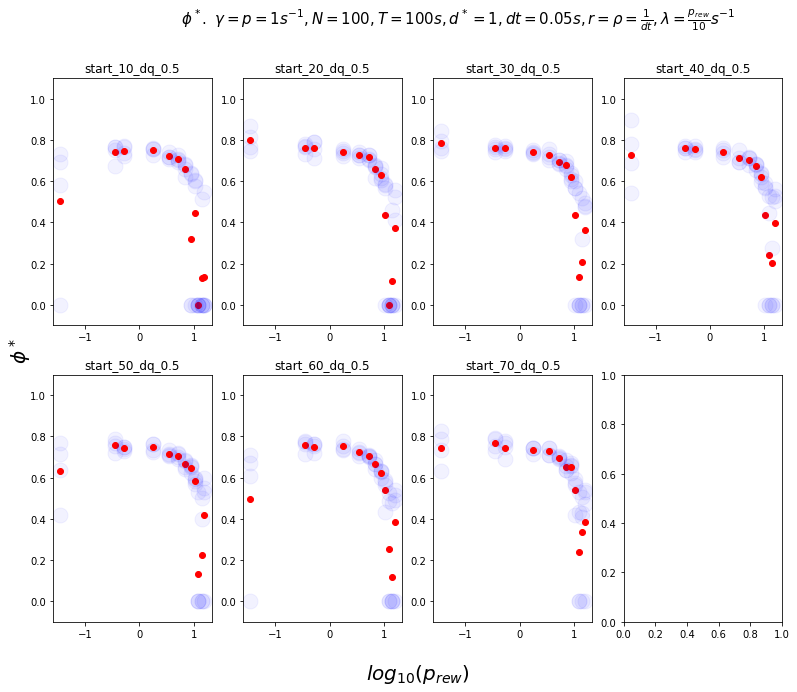

In [4]:
sampling_average_list_infected = []
file = 'infec_frac.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

N = 100
rew_r = 30
density = 1/N
vals = round(1/((density)*(np.pi)*(rew_r*rew_r)),3)
p_rew_vals = [0.035,0.35,0.525,1.75,10.5,12.25,14,15.75,3.5,5.25,7,8.75]
start_vals = [10,20,30,40,50,60,70]
dose_quantity_vals = [0.5]

d = 0
counter = 0
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))
b = 0
n = 0
m = 0
while b < 7 :
    if b == 4 :
        n = 1
        m = 0
    for a in range(len(p_rew_vals)) :
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title_title = 'start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        ax[n,m].set_title(key_half_title_title)
        ax[n,m].set_ylim([-0.1,1.1])
        sampling_average = obtain_infec_sampling_average(key_half,file)
        print(sampling_average)
        sampling_average_list_infected.append(sampling_average)
        for i in range(70,74) :
            key = 'sim_'+str(i)+key_half
            df = pd.read_hdf(file,key)
            count_deg = df.values
            j = 2000
            average = np.mean(count_deg[:,j-100:j],axis=1)
            im = ax[n,m].plot(np.log10(p_rew_vals[a]),average,'b.',markersize=30,alpha = 0.05)
        im = ax[n,m].plot(np.log10(p_rew_vals[a]),sampling_average,'r.',markersize=12)
    m = m + 1
    b = b + 1
counter = counter + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'$\phi^*.$ $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 15)
nax.set_xlabel(r'$log_{10}(p_{rew})$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'$\phi^*$', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

# cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.savefig("blah1.svg", format="svg")

In [3]:
def obtain_infec_sampling_average(key_half,file) :
    sampling = []
    for j in range(70,74) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        df = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        count_deg = df.values
        sampling.append(count_deg)

    sampling_average = np.ones(shape=np.shape(count_deg))
    for i in range(df.shape[1]) :
        sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
    return sampling_average

[0.035, 0.35, 0.525, 1.75, 3.5, 5.25, 7, 8.75, 10.5, 12.25, 14, 15.75]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83


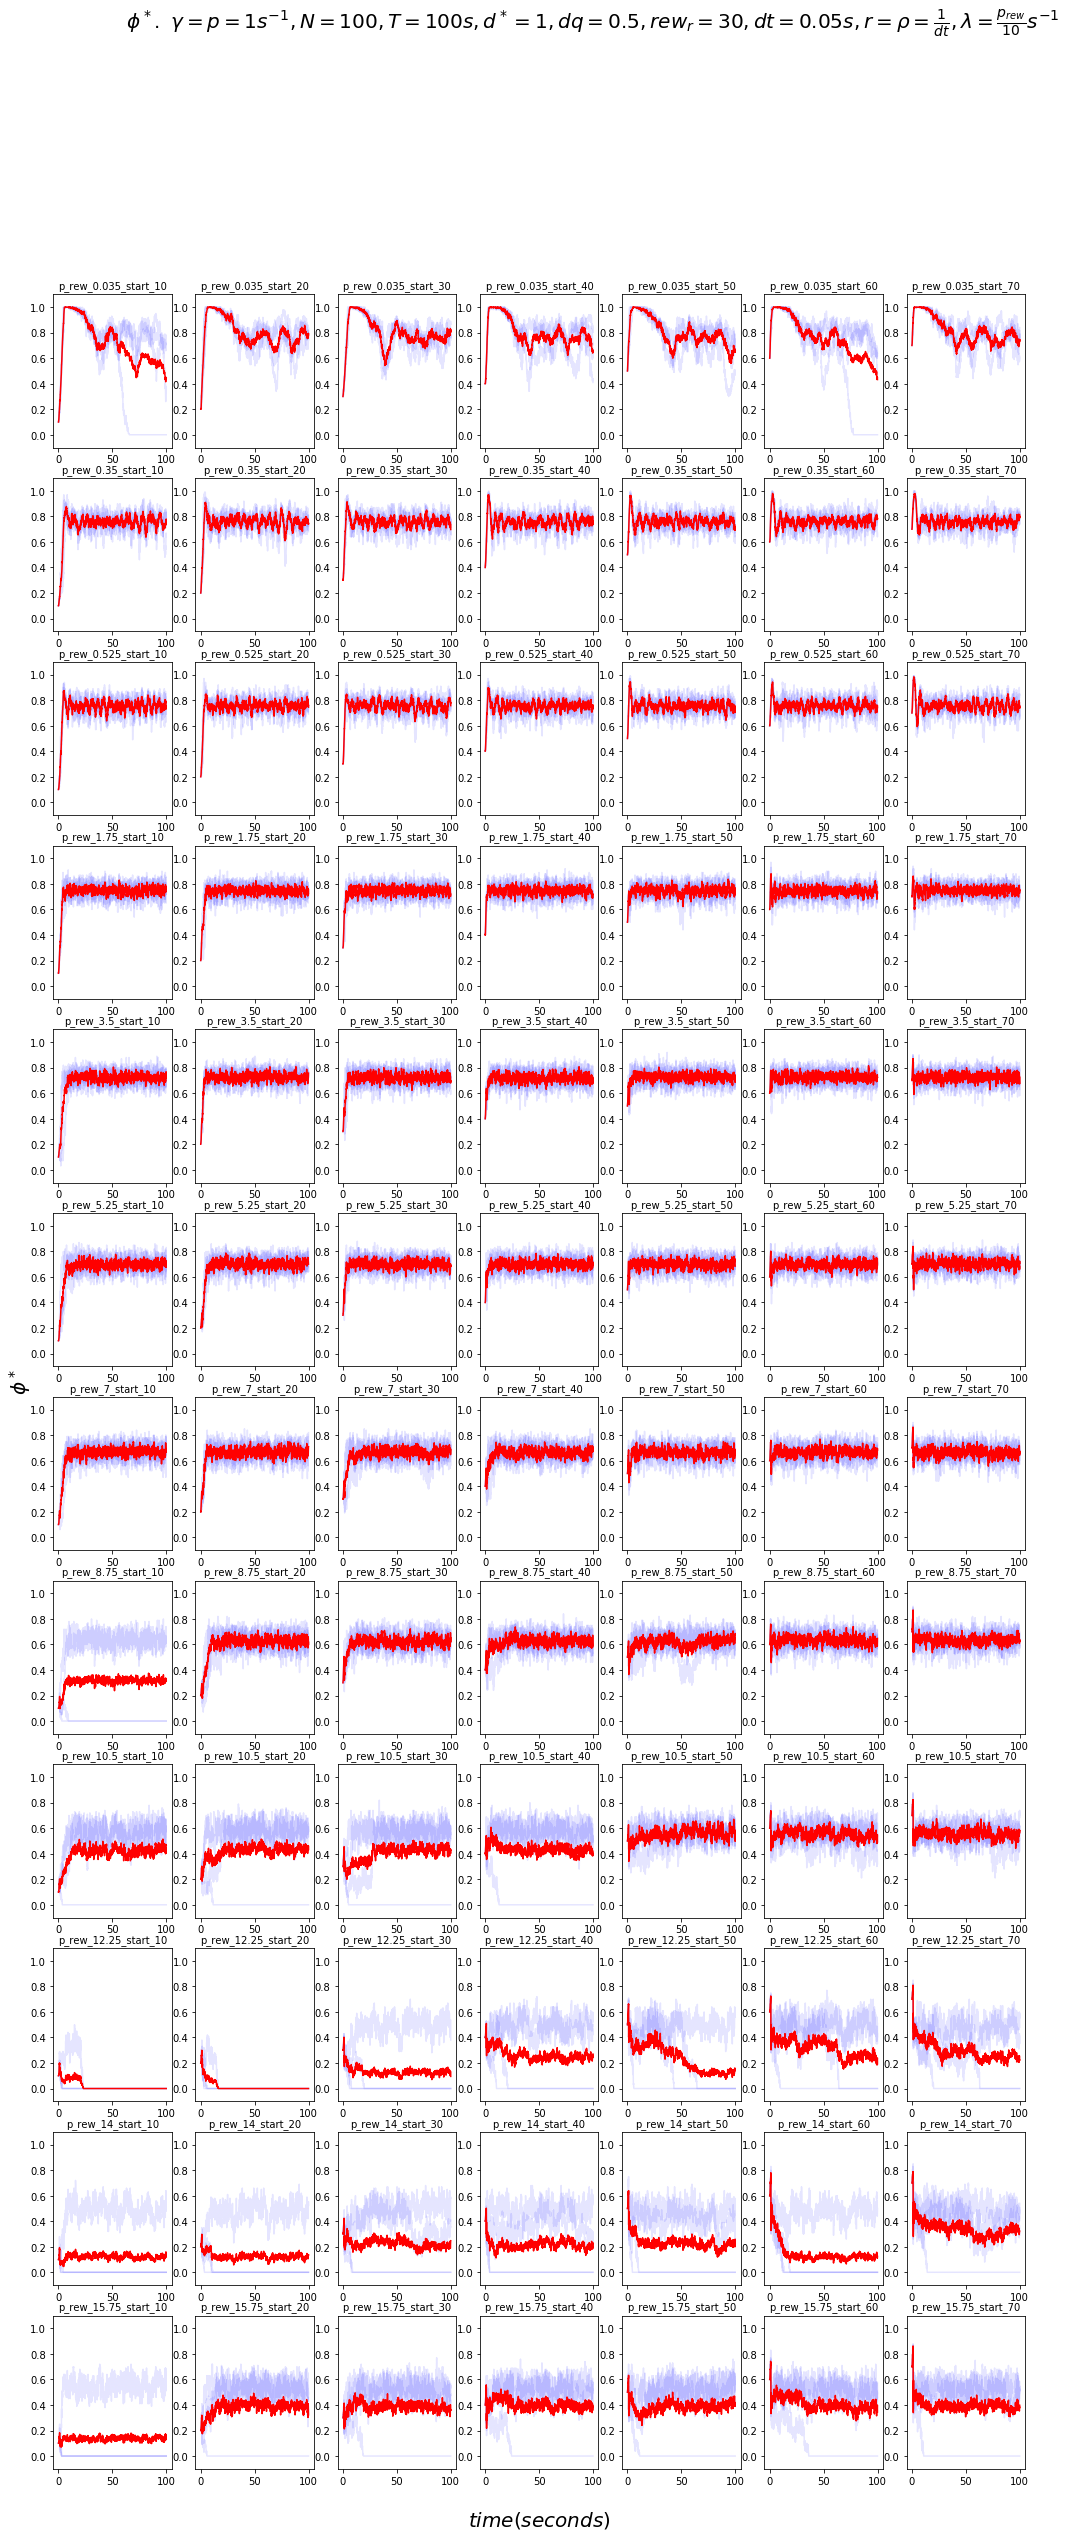

In [5]:
sampling_average_list_infected = []
file = 'infec_frac.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

N = 100
rew_r = 25
density = 1/N
vals = round(1/((density)*(np.pi)*(rew_r*rew_r)),3)
p_rew_vals = [0.035,0.35,0.525,1.75,10.5,12.25,14,15.75,3.5,5.25,7,8.75]
p_rew_vals.sort()
print(p_rew_vals)
start_vals = [10,20,30,40,50,60,70]
dose_quantity_vals = [0.5]

counter = 0
fig, ax = plt.subplots(nrows=12, ncols=7, figsize=(20,40))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if b == 7:
            b = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title_titles = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])
#         if a == 3 :
#             key_half = '_p_rew_51'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        ax[m, n].set_title(key_half_title_titles,fontsize=10)
        ax[m, n].set_ylim([-0.1,1.1])
        sampling_average = obtain_infec_sampling_average(key_half,file)
        for i in range(70,74) :
            key = 'sim_'+str(i)+key_half
            df = pd.read_hdf(file,key)
            count_deg = df.values
            im = col.plot(x.flatten(),count_deg.flatten(),color='blue',linestyle = '-',alpha = 0.1)
        im = col.plot(x.flatten(),sampling_average.flatten(),color='red',linestyle = '-')
        counter = counter + 1
        n = n + 1
        b = b + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'$\phi^*.$ $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,dq=0.5,rew_{r}=30,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'$\phi^*$', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

# cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.savefig("infec_frac_all.png", format="png")